# Exercício Prático: Aprendizagem Supervisionada Regressão

## Predição de valor de imóvel para o estado da California

O objetivo nesse exercício é que vocês implementem regressores para predição de valores reais.

<div>
<img src="https://www.segurospromo.com.br/blog/wp-content/uploads/2020/07/cidades-da-california-los-angeles.jpg", width="640"/>
<div/>

# 1) Obtenção dos Dados

Carregando as bibliotecas essenciais e os dataset


In [ ]:
# bibliotecas numéricas numpy, pandas e para plot matplotlib e seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [ ]:
# para o data set usaremos o exemplo contido no próprio scikit-learn
from sklearn.datasets import fetch_california_housing # procure no scikit qual é o dataset da california

california_dataset = fetch_california_housing()  # objeto dataset do scikit, transformar em pandas

O que é um dataset do scikit-learn?

Objeto e seu atributos

In [ ]:
# descrevendo os objetos
print('nomes de atributos', '\n\n')
print('Descrição', '\n\n')
print('dados', '\n\n')
print('target', '\n\n')
print('nome do arquivo', '\n\n')

nomes de atributos 


Descrição 


dados 


target 


nome do arquivo 




In [ ]:
# transformando em pandas DataFrame
dataset = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)

# exibindo parte do dados
print(dataset.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [ ]:
# adicionando o 'target' variável objetivo ('preço') ao dataset
dataset['MEDV'] = california_dataset.target

print(dataset.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
# apresentando a função display para dataframes
display(dataset.head(5))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#2) Visulizando e dividindo os dados

### Organizando o dataset

In [ ]:
# Como habitualmente, dividimos o conjunto entre 'featuers/atributos' e 'targets/saídas'
array = dataset.values
print(type(array))
X = array[:,0:13]
y = array[:,0:13]

<class 'numpy.ndarray'>


In [ ]:
# para dividir automaticamente os dados
from sklearn.model_selection import train_test_split

# dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [ ]:
print("Formato de X_train: ",X_train.shape)
print("Formato de X_test: ", X_test.shape)
print("Formato de y_train: ",y_train.shape)
print("Formato de y_test",y_test.shape)

Formato de X_train:  (14448, 9)
Formato de X_test:  (6192, 9)
Formato de y_train:  (14448, 9)
Formato de y_test (6192, 9)


### Visualizando os **dados**

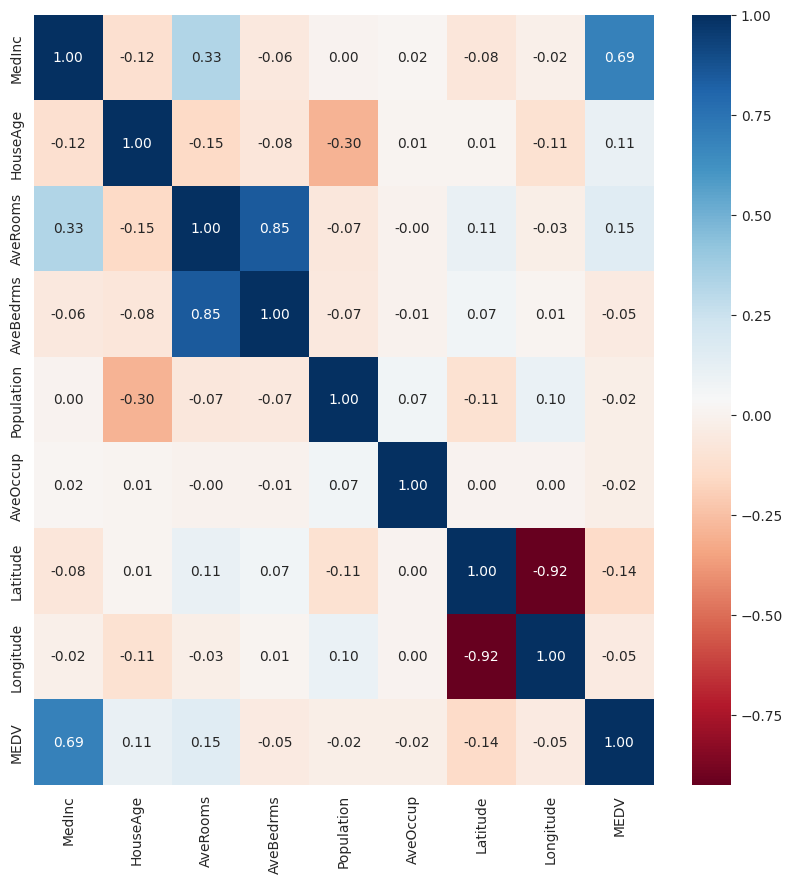

In [ ]:
# obtendo a estatítica de correlação
corr = dataset.corr()

# gerando o gráfico de 'heatmap' e plotando
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

# definindo os 'labels' do gráfico
plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns, ha="center")
plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns, va='center')

#show plot
plt.show()

#3) Criando e treinando os modelos e avaliando os resultados

In [ ]:
# importando as funções de avaliação
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Começando com o modelo LinearRegression

### Modelo Linear Regression

In [ ]:
# carregando o modelo
from sklearn.linear_model import LinearRegression

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_1 = cross_val_score(estimator=model_1, X=X_train, y=y_train, cv=10)

In [ ]:
# calcular o desempenho usando a métrica r2
y_pred_train_1 = model_1.predict(X_train)
r2_train_1 = r2_score(y_train, y_pred_train_1)

y_pred_test_1 = model_1.predict(X_test)
r2_test_1 = r2_score(y_test, y_pred_test_1)

In [ ]:
# calcular o desepenho usando RMSE
rmse_1 = (np.sqrt(mean_squared_error(y_test, y_pred_test_1)))

In [ ]:
# exibindo os resultados
print('Modelo Linear Regression\n')
print('CV: ', cv_1.mean())
print('R2 train:', r2_train_1)
print('R2 test:', r2_test_1)
print('RMSE:', rmse_1)

Modelo Linear Regression

CV:  1.0
R2 train: 1.0
R2 test: 1.0
RMSE: 3.610012616978515e-13


### Modelo Decision Tree Regression

In [ ]:
# carregando o modelo
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_2 = cross_val_score(estimator=model_2, X=X_train, y=y_train, cv=10)

In [ ]:
# calcular o desempenho usando a métrica r2
y_pred_train_2 = model_2.predict(X_train)
r2_train_2 = r2_score(y_train, y_pred_train_2)

y_pred_test_2 = model_2.predict(X_test)
r2_test_2 = r2_score(y_test, y_pred_test_2)

In [ ]:
# calcular o desepenho usando RMSE
rmse_2 = (np.sqrt(mean_squared_error(y_test, y_pred_test_2)))

In [ ]:
# exibindo os resultados
print('Modelo DecisionTreeRegression\n')
print('CV: ', cv_2.mean())
print('R2 train:', r2_train_2)
print('R2 test:', r2_test_2)
print('RMSE:', rmse_2)

Modelo DecisionTreeRegression

CV:  -21.40682595520597
R2 train: 1.0
R2 test: 0.2644515145531536
RMSE: 30.50495607680529


### Modelo Polynomial Regression de 2 ordem

In [ ]:
# carregando o modelo
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

model_3 = LinearRegression()
model_3.fit(X_poly, y_train)

LinearRegression()

In [ ]:
print(X_train.shape)

(14448, 9)


In [ ]:
print(X_poly.shape)

(14448, 55)


In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_3 = cross_val_score(estimator=model_3, X=X_poly, y=y_train, cv=10)

# calcular o desempenho usando a métrica r2
y_pred_train_3 = model_3.predict(X_poly)
r2_train_3 = r2_score(y_train, y_pred_train_3)

y_pred_test_3 = model_3.predict(poly_reg.fit_transform(X_test))
r2_test_3 = r2_score(y_test, y_pred_test_3)

# calcular o desepenho usando RMSE
rmse_3 = (np.sqrt(mean_squared_error(y_test, y_pred_test_3)))

In [ ]:
# exibindo os resultados
print('Modelo DecisionTreeRegression\n')
print('CV: ', cv_3.mean())
print('R2 train:', r2_train_3)
print('R2 test:', r2_test_3)
print('RMSE:', rmse_3)

Modelo DecisionTreeRegression

CV:  1.0
R2 train: 1.0
R2 test: 1.0
RMSE: 2.236959840590775e-09


# Outro Modelo de Sua Escolha 1

In [ ]:
# Modelo Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# carregando o modelo
model_4 = RandomForestRegressor()
model_4.fit(X_train, y_train)

# avaliar o desempenho de acurácia usando o cross-validation
cv_4 = cross_val_score(estimator=model_4, X=X_train, y=y_train, cv=10)

# calcular o desempenho usando a métrica r2
y_pred_train_4 = model_4.predict(X_train)
r2_train_4 = r2_score(y_train, y_pred_train_4)

y_pred_test_4 = model_4.predict(X_test)
r2_test_4 = r2_score(y_test, y_pred_test_4)

# calcular o desepenho usando RMSE
rmse_4 = (np.sqrt(mean_squared_error(y_test, y_pred_test_4)))

# exibindo os resultados
print('Modelo Random Forest Regression\n')
print('CV: ', cv_4.mean())
print('R2 train:', r2_train_4)
print('R2 test:', r2_test_4)
print('RMSE:', rmse_4)


Modelo Random Forest Regression

CV:  0.10189642363691125
R2 train: 0.9266288270280292
R2 test: 0.5632223973891213
RMSE: 57.31457287622462


# Outro Modelo de Sua Escolha 2

In [ ]:
# Modelo KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# carregando o modelo
model_5 = KNeighborsRegressor()
model_5.fit(X_train, y_train)

# avaliar o desempenho de acurácia usando o cross-validation
cv_5 = cross_val_score(estimator=model_5, X=X_train, y=y_train, cv=10)

# calcular o desempenho usando a métrica r2
y_pred_train_5 = model_5.predict(X_train)
r2_train_5 = r2_score(y_train, y_pred_train_5)

y_pred_test_5 = model_5.predict(X_test)
r2_test_5 = r2_score(y_test, y_pred_test_5)

# calcular o desepenho usando RMSE
rmse_5 = (np.sqrt(mean_squared_error(y_test, y_pred_test_5)))

# exibindo os resultados
print('Modelo KNeighborsRegressor\n')
print('CV: ', cv_5.mean())
print('R2 train:', r2_train_5)
print('R2 test:', r2_test_5)
print('RMSE:', rmse_5)


Modelo KNeighborsRegressor

CV:  0.5354782014090412
R2 train: 0.7258686193679167
R2 test: 0.6068043633537514
RMSE: 79.39321993214543


# Outro Modelo de Sua escolha 3

In [ ]:
#modelo MLPRegressor
from sklearn.neural_network import MLPRegressor

# Carregando o modelo
model_6 = MLPRegressor()
model_6.fit(X_train, y_train)

# Avaliar o desempenho de acurácia usando o cross-validation
cv_6 = cross_val_score(estimator=model_6, X=X_train, y=y_train, cv=10)

# Calcular o desempenho usando a métrica r2
y_pred_train_6 = model_6.predict(X_train)
r2_train_6 = r2_score(y_train, y_pred_train_6)

y_pred_test_6 = model_6.predict(X_test)
r2_test_6 = r2_score(y_test, y_pred_test_6)

# Calcular o desempenho usando RMSE
rmse_6 = (np.sqrt(mean_squared_error(y_test, y_pred_test_6)))

# Exibindo os resultados
print('Modelo MLPRegressor\n')
print('CV: ', cv_6.mean())
print('R2 train:', r2_train_6)
print('R2 test:', r2_test_6)
print('RMSE:', rmse_6)


Modelo MLPRegressor

CV:  0.5004260355648013
R2 train: 0.9459066822841038
R2 test: 0.9454582570671959
RMSE: 0.420320474414453


#4) Comparando o desempenho

In [ ]:
# medindo o erro

models = [('Linear Regression', rmse_1, r2_train_1, r2_test_1, cv_1.mean()),
          ('Decision Tree Regression', rmse_2, r2_train_2, r2_test_2, cv_2.mean()),
          ('Polynomial Regression (2nd)', rmse_3, r2_train_3, r2_test_3, cv_3.mean()),
          ('Random Forest Regression', rmse_4, r2_train_4, r2_test_4, cv_4.mean()),
          ('KNeighborsRegressor', rmse_5, r2_train_5, r2_test_5, cv_5.mean()),
          ('MLPRegressor', rmse_6, r2_train_6, r2_test_6, cv_6.mean()),
         ]

         ### ADICIONE OS MODELOS 1, 2, 3 de sua escolha para comparar com os demais

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(train)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(train),R2_Score(test),Cross-Validation
0,Linear Regression,3.610013e-13,1.000000,1.000000,1.000000
1,Decision Tree Regression,3.050496e+01,1.000000,0.264452,-21.406826
2,Polynomial Regression (2nd),2.236960e-09,1.000000,1.000000,1.000000
3,Random Forest Regression,5.731457e+01,0.926629,0.563222,0.101896
4,KNeighborsRegressor,7.939322e+01,0.725869,0.606804,0.535478
5,MLPRegressor,4.203205e-01,0.945907,0.945458,0.500426


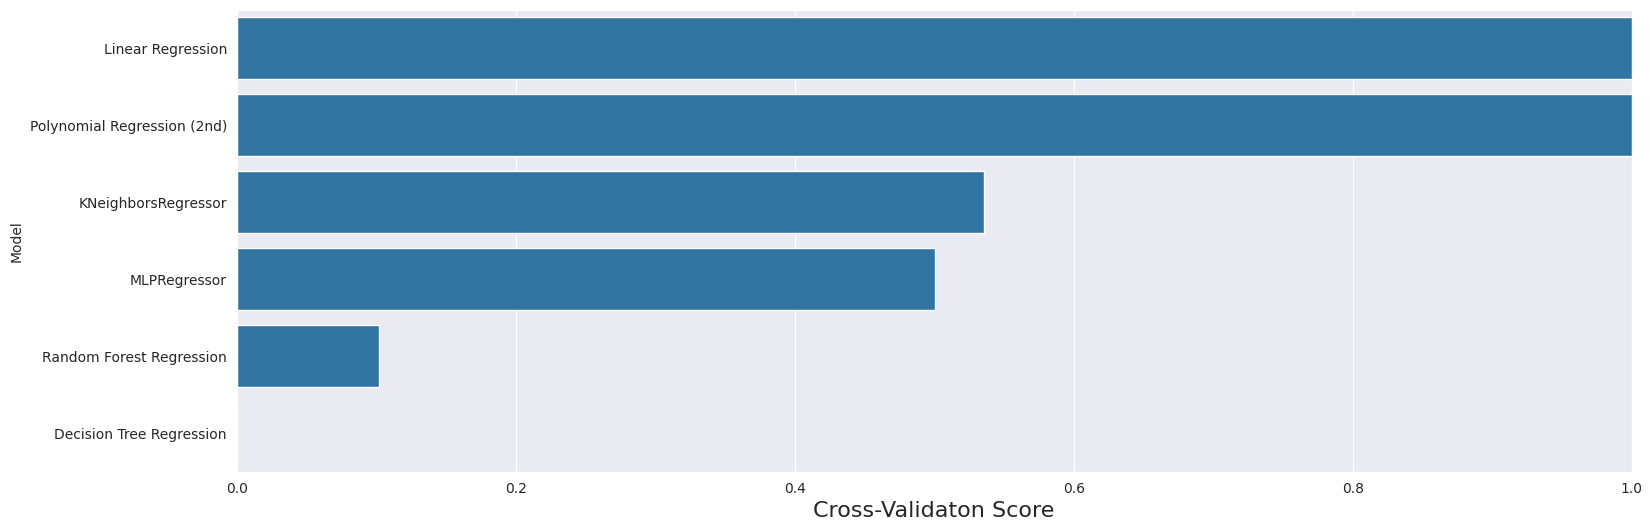

In [ ]:
# visualizanto como gráfico

f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

<ipython-input-52-910f80665ad0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2_Score(train)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning

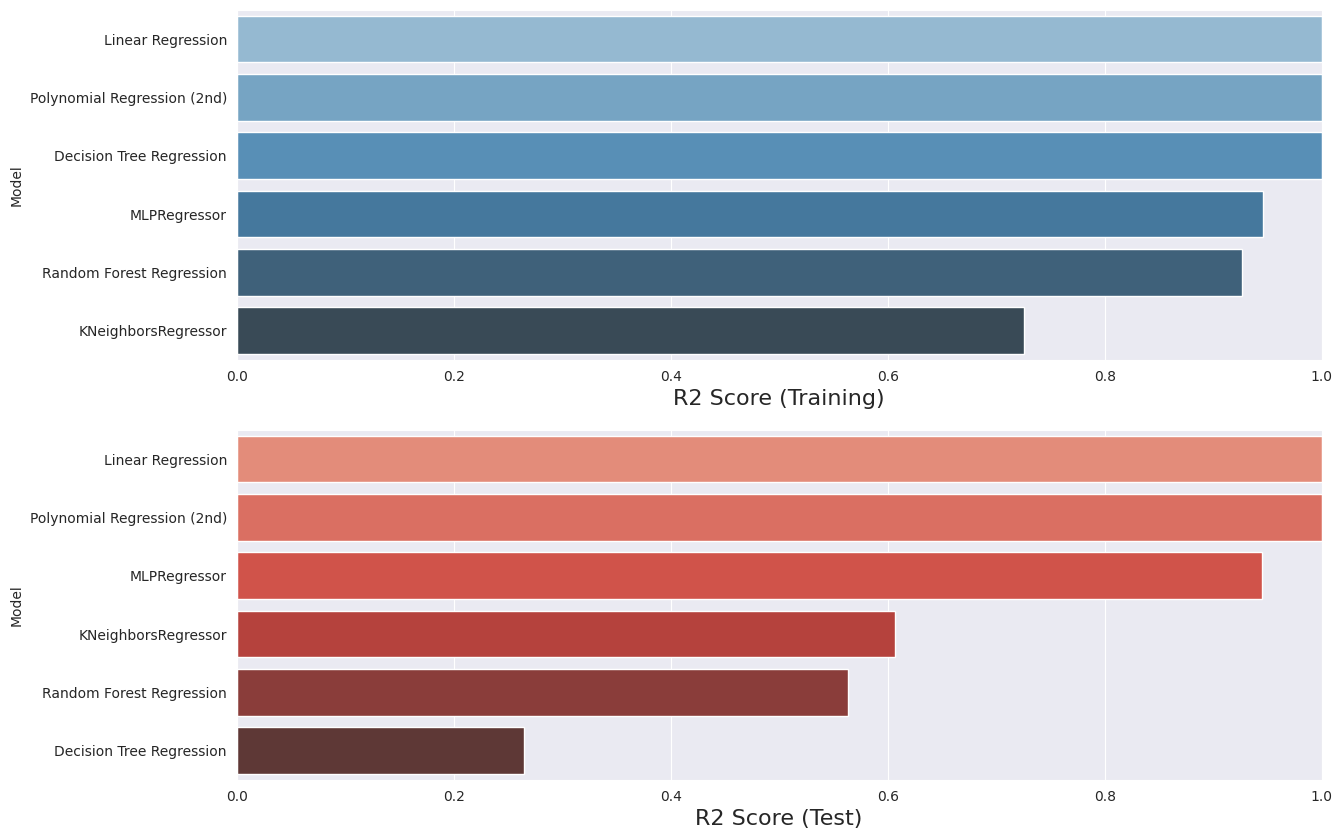

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(train)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(train)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

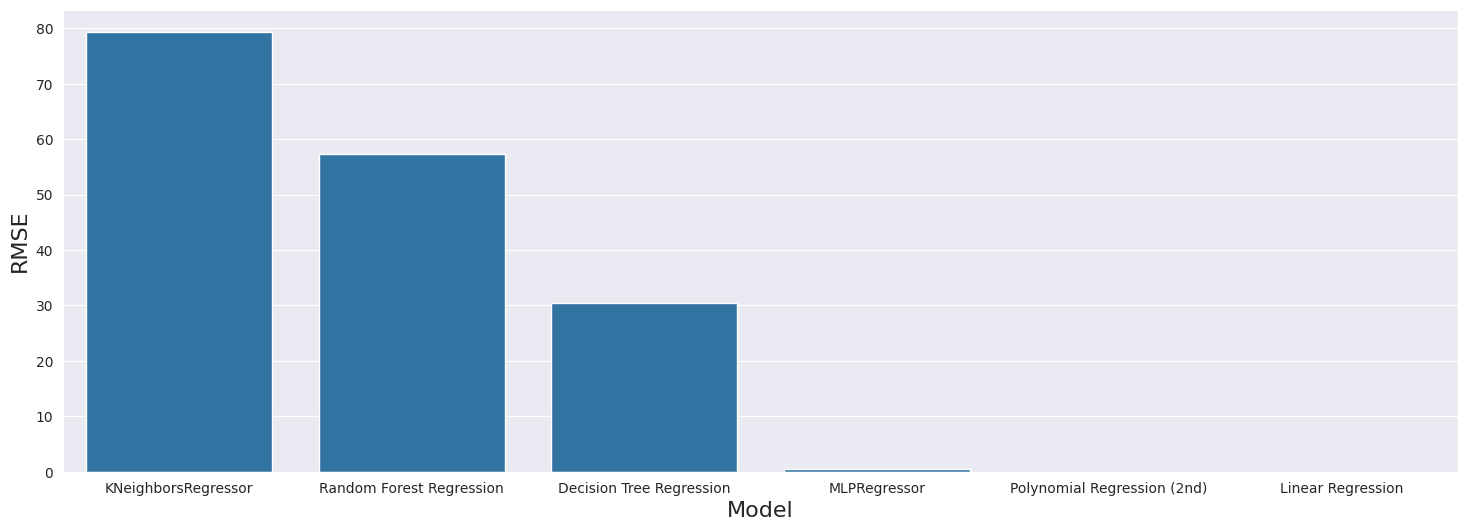

In [ ]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()